In [33]:
#import necessary libraries
from sklearn import (datasets,
                     feature_selection as ftr_sel,
                     model_selection as skms,
                     linear_model, metrics)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
#load the dataset and create variable
boston = datasets.load_boston()
#take a look at what the dict contains
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [20]:
#load the data into a pandas dataframe
bostondf = pd.DataFrame(boston.data,
                        columns=boston.feature_names)
#create new column based on target
bostondf['target'] = boston.target
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
#check all the columns for null values
#there are none
bostondf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

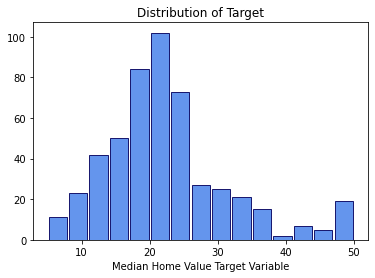

In [35]:
#before creating a regression model, let's do some exploration
#plot a histogram of the median homevalue with matplotlib
plt.hist(bostondf['target'], rwidth=.90, bins=15, color='cornflowerblue', edgecolor='midnightblue')
plt.title('Distribution of Target')
plt.xlabel('Median Home Value Target Variable')
plt.show()

#the distribution is mostly normal

In [39]:
#build a correlation matrix to see the strength of the relationship between variables and target
bostondf.corr()
#RM and LSTAT have the strongest correlation and should be used to fit the regression model
#This matrix also shows colinearity between variables. Those should not be included in the model

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [48]:
#create a new dataframe with the two selected variables and the target
Y = bostondf['target']
X = bostondf[['RM', 'LSTAT']]

In [55]:
#using just the two variables with high correlation to target,
#partition the dataset into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

#create the linear model
lr = linear_model.LinearRegression()
#fit the model to the trianing data
fit = lr.fit(X_train, Y_train)
#make predictions based on test features data
preds = fit.predict(X_test)

#evaluate predictions against test targets
#The RMSE score shows it is a good model
score = np.sqrt(metrics.mean_squared_error(Y_test, preds))
print('The RMSE is:', score)

The RMSE is: 5.137400784702911
